In [1]:
import pandas as pd
notas = pd.read_csv('ratings.csv')
notas.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [2]:
notas.shape

(100836, 4)

In [3]:
notas.columns = ['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
notas['nota'].unique()

array([4. , 5. , 3. , 2. , 1. , 4.5, 3.5, 2.5, 0.5, 1.5])

In [5]:
notas['nota'].value_counts()

4.0    26818
3.0    20047
5.0    13211
3.5    13136
4.5     8551
2.0     7551
2.5     5550
1.0     2811
1.5     1791
0.5     1370
Name: nota, dtype: int64

In [6]:
notas['nota'].mean()

3.501556983616962

In [7]:
notas.nota

0         4.0
1         4.0
2         4.0
3         5.0
4         5.0
5         3.0
6         5.0
7         4.0
8         5.0
9         5.0
10        5.0
11        5.0
12        3.0
13        5.0
14        4.0
15        5.0
16        3.0
17        3.0
18        5.0
19        4.0
20        4.0
21        5.0
22        4.0
23        3.0
24        4.0
25        5.0
26        4.0
27        3.0
28        5.0
29        4.0
         ... 
100806    3.0
100807    4.0
100808    4.0
100809    3.5
100810    3.5
100811    5.0
100812    4.5
100813    4.0
100814    5.0
100815    3.5
100816    3.5
100817    3.0
100818    3.0
100819    3.0
100820    2.5
100821    4.5
100822    3.0
100823    3.0
100824    4.0
100825    4.0
100826    3.5
100827    3.5
100828    3.5
100829    5.0
100830    4.0
100831    4.0
100832    5.0
100833    5.0
100834    5.0
100835    3.0
Name: nota, Length: 100836, dtype: float64

In [8]:
notas.nota.head()

0    4.0
1    4.0
2    4.0
3    5.0
4    5.0
Name: nota, dtype: float64

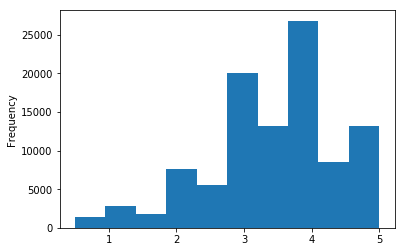

In [9]:
notas.nota.plot(kind='hist')

In [10]:
notas.nota.median()

3.5

In [11]:
notas.nota.describe()

count    100836.000000
mean          3.501557
std           1.042529
min           0.500000
25%           3.000000
50%           3.500000
75%           4.000000
max           5.000000
Name: nota, dtype: float64

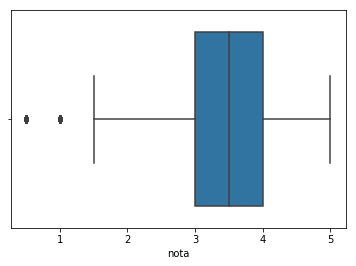

In [12]:
!pip install seaborn==0.9.0
import seaborn as sns
sns.boxplot(notas.nota)

In [13]:
filmes = pd.read_csv('movies.csv')
filmes.columns = ["filmeId", "titulo", "generos"]
notas.query("filmeId==1").nota

0        4.0
516      4.0
874      4.5
1434     2.5
1667     4.5
1772     3.5
2274     4.0
3219     3.5
4059     3.0
4879     5.0
4929     3.0
5031     3.0
5555     5.0
6315     5.0
6429     3.0
6477     4.0
6876     5.0
7112     3.0
7931     3.0
8035     5.0
9157     5.0
9428     4.0
9979     4.0
10360    2.5
11728    5.0
11808    4.5
12264    0.5
12412    4.0
12730    2.5
13402    4.0
        ... 
84327    3.0
84603    3.0
84780    4.0
85291    4.0
85984    5.0
86124    3.0
86582    4.0
87087    4.5
87791    3.5
88219    4.0
88522    4.0
88677    5.0
89243    4.0
89316    3.0
89904    5.0
90256    5.0
90517    4.0
91748    4.0
92159    4.0
92623    3.0
95101    2.5
95864    4.0
96100    4.0
97043    3.0
97143    4.0
97364    2.5
98479    4.0
98666    2.5
99497    3.0
99534    5.0
Name: nota, Length: 215, dtype: float64

Olhando os filmes

In [14]:
notas.query('filmeId==1').nota.mean()

3.9209302325581397

In [15]:
notas.query('filmeId==2').nota.mean()

3.4318181818181817

In [16]:
media_por_filme = notas.groupby('filmeId').nota.mean()
media_por_filme.head()

filmeId
1    3.920930
2    3.431818
3    3.259615
4    2.357143
5    3.071429
Name: nota, dtype: float64

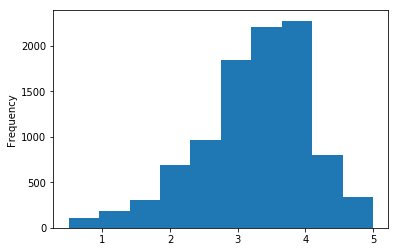

In [17]:
media_por_filme.plot(kind="hist")

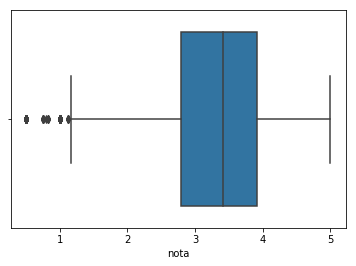

In [18]:
sns.boxplot(media_por_filme)

In [19]:
media_por_filme.describe()

count    9724.000000
mean        3.262448
std         0.869874
min         0.500000
25%         2.800000
50%         3.416667
75%         3.911765
max         5.000000
Name: nota, dtype: float64

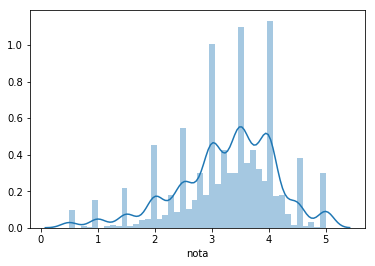

In [20]:
sns.distplot(media_por_filme)

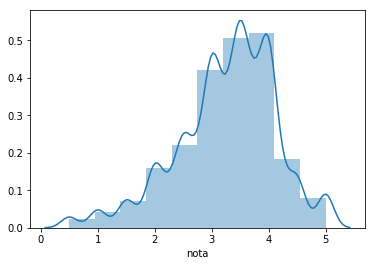

In [21]:
sns.distplot(media_por_filme, bins=10)

Text(0.5, 1.0, 'Histograma das medias dos filmes')

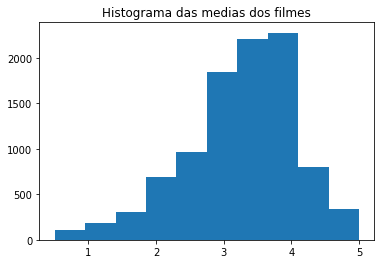

In [22]:
import matplotlib.pyplot as plt
plt.hist(media_por_filme)
plt.title("Histograma das medias dos filmes")

In [23]:
tmdb = pd.read_csv('tmdb_5000_movies.csv')
tmdb.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [24]:
tmdb.original_language.unique()

array(['en', 'ja', 'fr', 'zh', 'es', 'de', 'hi', 'ru', 'ko', 'te', 'cn',
       'it', 'nl', 'ta', 'sv', 'th', 'da', 'xx', 'hu', 'cs', 'pt', 'is',
       'tr', 'nb', 'af', 'pl', 'he', 'ar', 'vi', 'ky', 'id', 'ro', 'fa',
       'no', 'sl', 'ps', 'el'], dtype=object)

In [25]:
tmdb.groupby('original_language').original_language.count()

original_language
af       1
ar       2
cn      12
cs       2
da       7
de      27
el       1
en    4505
es      32
fa       4
fr      70
he       3
hi      19
hu       1
id       2
is       1
it      14
ja      16
ko      11
ky       1
nb       1
nl       4
no       1
pl       1
ps       1
pt       9
ro       2
ru      11
sl       1
sv       5
ta       2
te       1
th       3
tr       1
vi       1
xx       1
zh      27
Name: original_language, dtype: int64

In [26]:
tmdb.vote_average.unique()

array([ 7.2,  6.9,  6.3,  7.6,  6.1,  5.9,  7.4,  7.3,  5.7,  5.4,  7. ,
        6.5,  6.4,  6.2,  7.1,  5.8,  6.6,  7.5,  5.5,  6.7,  6.8,  6. ,
        5.1,  7.8,  5.6,  5.2,  8.2,  7.7,  5.3,  8. ,  4.8,  4.9,  7.9,
        8.1,  4.7,  5. ,  4.2,  4.4,  4.1,  3.7,  3.6,  3. ,  3.9,  4.3,
        4.5,  3.4,  4.6,  8.3,  3.5,  4. ,  2.3,  3.2,  0. ,  3.8,  2.9,
        8.5,  1.9,  3.1,  3.3,  2.2,  0.5,  9.3,  8.4,  2.7, 10. ,  1. ,
        2. ,  2.8,  9.5,  2.6,  2.4])

In [27]:
tmdb['original_language'].value_counts()

en    4505
fr      70
es      32
de      27
zh      27
hi      19
ja      16
it      14
cn      12
ko      11
ru      11
pt       9
da       7
sv       5
fa       4
nl       4
th       3
he       3
cs       2
ar       2
ta       2
ro       2
id       2
no       1
xx       1
sl       1
is       1
el       1
ky       1
tr       1
ps       1
te       1
af       1
nb       1
pl       1
vi       1
hu       1
Name: original_language, dtype: int64

In [28]:
contagem_de_lingua = tmdb['original_language'].value_counts().to_frame().reset_index()
contagem_de_lingua.columns = ['original_lingua', 'total']
contagem_de_lingua.head()

,original_lingua,total
0,en,4505
1,fr,70
2,es,32
3,de,27
4,zh,27


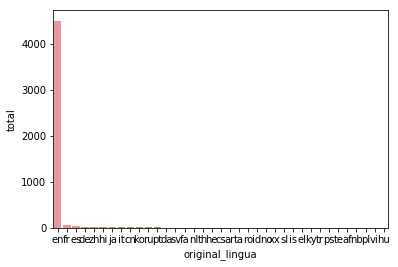

In [29]:
sns.barplot(x="original_lingua", y="total", data = contagem_de_lingua)

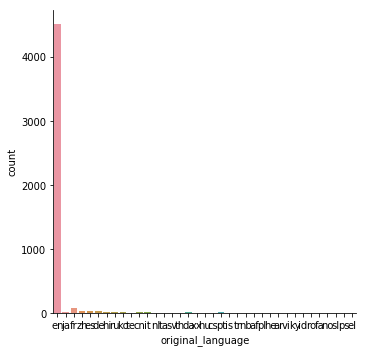

In [34]:
sns.catplot(x = "original_language", kind='count', data = tmdb)

([<matplotlib.patches.Wedge at 0x7fef4f75c438>,
 [Text(-1.0791697536499925, 0.2130554923183512, 'en'),
  Text(1.0355355017029462, -0.3710339940124459, 'fr'),
  Text(1.0579676486019882, -0.3011718023181785, 'es'),
  Text(1.0687996606645356, -0.26012936274741094, 'de'),
  Text(1.0773191105706255, -0.22222406260195313, 'zh'),
  Text(1.0835167978583342, -0.18971386021801853, 'hi'),
  Text(1.0875756432724297, -0.16486121484618815, 'ja'),
  Text(1.0906010773146022, -0.14348968659882622, 'it'),
  Text(1.092883487371409, -0.12492270822755745, 'cn'),
  Text(1.0946390911069936, -0.10846778425161549, 'ko'),
  Text(1.0960865535188649, -0.09270527058984593, 'ru'),
  Text(1.0972054830031333, -0.07835896928789601, 'pt'),
  Text(1.097965443340663, -0.06687215586282344, 'da'),
  Text(1.0984565010300316, -0.05825217030171998, 'sv'),
  Text(1.0987803851616647, -0.0517847968421653, 'fa'),
  Text(1.0990363161210686, -0.04603450713357274, 'nl'),
  Text(1.0992355702663055, -0.04100196411527794, 'th'),
  Text

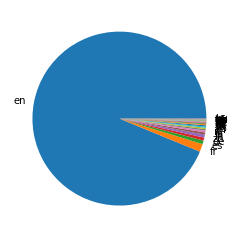

In [42]:
plt.pie(contagem_de_lingua["total"], labels = contagem_de_lingua['original_lingua']) #Não recomendado grafico de pizza ou torta

In [49]:
total_por_lingua = tmdb['original_language'].value_counts()
total_geral = total_por_lingua.sum()
total_de_ingles = total_por_lingua.loc['en']
total_do_resto = total_geral - total_de_ingles
print(total_de_ingles, total_do_resto)

4505 298


In [57]:
dados = {
    "lingua" : ["ingles", "outros"],
    "total" : [total_de_ingles, total_do_resto]
}

dados = pd.DataFrame(dados)
dados

,lingua,total
0,ingles,4505
1,outros,298


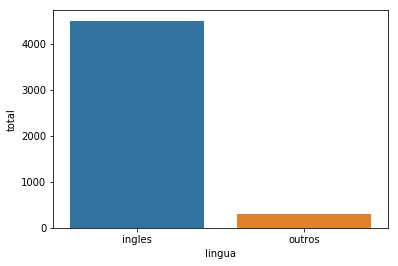

In [59]:
sns.barplot(x="lingua", y = "total", data=dados)

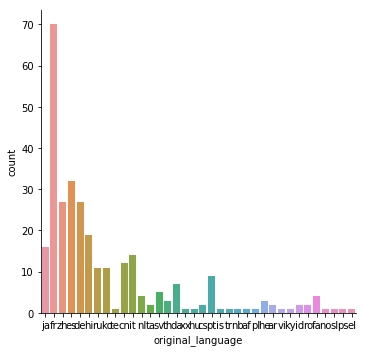

In [74]:
filmes_sem_lingua_original_em_ingles = tmdb.query("original_language != 'en'")
sns.catplot(x = "original_language", kind="count", data = filmes_sem_lingua_original_em_ingles)